# Analyse d'incidence de la varicelle

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import requests
import csv
from pathlib import Path

## Lecture des données

In [6]:
URL = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [7]:
r = requests.get(URL)

In [13]:
file_data = r"C:\Users\renau\mooc-rr\module3\exo3\incidence_varicelles.csv" 
if (Path(file_data).is_file() == False): 
    file_data = open(file_data,"w",encoding = "ANSI")
    file_data.write(r.text)
    file_data.close()

In [17]:
data_raw = pd.read_csv(file_data, sep =',', encoding = 'ANSI', skiprows = 1)
data_raw

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202106          7  14719    10462   18976      22          16   
1     202105          7  12379     9107   15651      19          14   
2     202104          7  12026     8826   15226      18          13   
3     202103          7   8913     6375   11451      13           9   
4     202102          7   7795     5430   10160      12           8   
...      ...        ...    ...      ...     ...     ...         ...   
1571  199101          7  15565    10271   20859      27          18   
1572  199052          7  19375    13295   25455      34          23   
1573  199051          7  19080    13807   24353      34          25   
1574  199050          7  11079     6660   15498      20          12   
1575  199049          7   1143        0    2610       2           0   

      inc100_up geo_insee geo_name  
0            28        FR   France  
1            24        FR   France  
2            23        FR   France  
3            17        FR   France  
4            16        FR   France  
...         ...       ...      ...  
1571         36        FR   France  
1572         45        FR   France  
1573         43        FR   France  
1574         28        FR   France  
1575          5        FR   France  

[1576 rows x 10 columns]

In [18]:
data_raw[data_raw.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Je ne constate pas la présence de données nulles. 

In [22]:
data = data_raw

In [23]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period (w.day(0), 'W')

In [24]:
data['period'] = [convert_week(yw) for yw in data_raw['week']]

In [25]:
sorted_data = data.set_index('period').sort_index()

In [26]:
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
...                       ...        ...    ...      ...     ...     ...   
2021-01-11/2021-01-17  202102          7   7795     5430   10160      12   
2021-01-18/2021-01-24  202103          7   8913     6375   11451      13   
2021-01-25/2021-01-31  202104          7  12026     8826   15226      18   
2021-02-01/2021-02-07  202105          7  12379     9107   15651      19   
2021-02-08/2021-02-14  202106          7  14719    10462   18976      22   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
1990-12-03/1990-12-09           0          5        FR   France  
1990-12-10/1990-12-16          12         28        FR   France  
1990-12-17/1990-12-23          25         43        FR   France  
1990-12-24/1990-12-30          23         45        FR   France  
1990-12-31/1991-01-06          18         36        FR   France  
...                           ...        ...       ...      ...  
2021-01-11/2021-01-17           8         16        FR   France  
2021-01-18/2021-01-24           9         17        FR   France  
2021-01-25/2021-01-31          13         23        FR   France  
2021-02-01/2021-02-07          14         24        FR   France  
2021-02-08/2021-02-14          16         28        FR   France  

[1576 rows x 10 columns]

In [27]:
periods = sorted_data.index

In [28]:
periods

PeriodIndex(['1990-12-03/1990-12-09', '1990-12-10/1990-12-16',
             '1990-12-17/1990-12-23', '1990-12-24/1990-12-30',
             '1990-12-31/1991-01-06', '1991-01-07/1991-01-13',
             '1991-01-14/1991-01-20', '1991-01-21/1991-01-27',
             '1991-01-28/1991-02-03', '1991-02-04/1991-02-10',
             ...
             '2020-12-07/2020-12-13', '2020-12-14/2020-12-20',
             '2020-12-21/2020-12-27', '2020-12-28/2021-01-03',
             '2021-01-04/2021-01-10', '2021-01-11/2021-01-17',
             '2021-01-18/2021-01-24', '2021-01-25/2021-01-31',
             '2021-02-01/2021-02-07', '2021-02-08/2021-02-14'],
            dtype='period[W-SUN]', name='period', length=1576, freq='W-SUN')

In [29]:
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

<AxesSubplot:xlabel='period'>

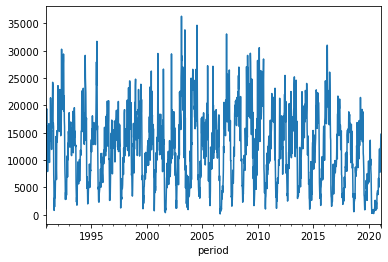

In [30]:
sorted_data['inc'].plot()

<AxesSubplot:xlabel='period'>

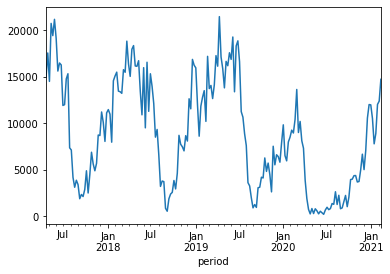

In [31]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le gros de l'épidémie va de janvier à juillet, la période de référence entre deux minima de l'incidence, est fixée du 1er septembre de l'année $N$ au 1er septembre de l'année $N+1$. On comence en 1991.

In [33]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [35]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

<AxesSubplot:>

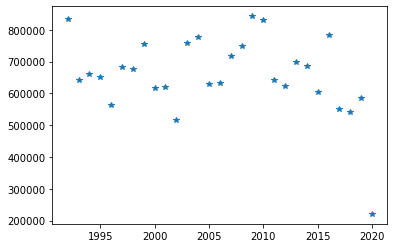

In [36]:
yearly_incidence.plot(style='*')

In [37]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

<AxesSubplot:>

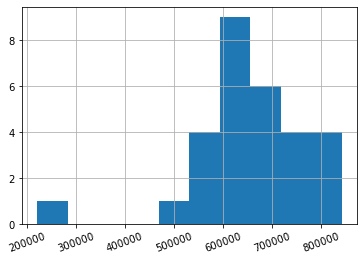

In [38]:
yearly_incidence.hist(xrot=20)